In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive//content/gdrive/My Drive/Colab Notebooks/' 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import libs
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import pickle

In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

#open x abd y df's
with open('x_df', 'rb') as x:
    x_df = pickle.load(x)

In [0]:
with open('y_df', 'rb') as y:
    y_df = pickle.load(y)

In [0]:
#split x and y data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(x_df,
                                  y_df,
                                  test_size=0.2,
                                  random_state=1)

In [0]:
#scoring metric to optimize
score = 'roc_auc'

In [0]:
################### MODEL 1 LOGISTIC REGRESSION WITH FEATURE REDUCTION

In [0]:
#Setup recursive feature reduction w/ cross validation
clf2 = RFECV(LogisticRegression(),
      scoring = score,
      n_jobs = -1,
      cv = 3,
      step = 5)

In [0]:
clf2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFECV(cv=3,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=5,
      verbose=0)

RFECV(cv=3,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=-1, scoring='roc_auc', step=5, verbose=0)

In [0]:
#Generate predicted probabilites
clf2_probs = clf2.predict_proba(X_test)
print('AUC: ', roc_auc_score(y_test, clf2_probs[:,1]))
print('Accuracy: ', clf2.score(X_test, y_test))

AUC:  0.905877206442923
Accuracy:  0.8875


In [0]:
#Pickle model 2
with open('clf2', 'wb') as c:
    pickle.dump(clf2, c, pickle.HIGHEST_PROTOCOL)

In [0]:
clf2_probs[:,1]

array([0.10567293, 0.07120671, 0.00762836, ..., 0.03927359, 0.00409619,
       0.15559699])

In [0]:
#model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
model = clf2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


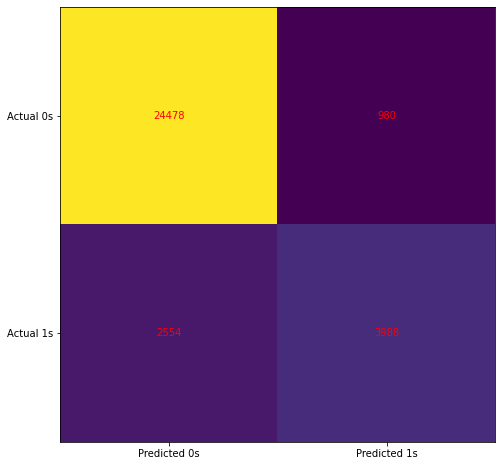

In [0]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, model.predict(X_train)) 

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [0]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     25458
           1       0.80      0.61      0.69      6542

    accuracy                           0.89     32000
   macro avg       0.85      0.79      0.81     32000
weighted avg       0.88      0.89      0.88     32000



In [0]:
################# EXTRA SVM (Support Vector Model) #####################

In [0]:
#setup grid search
#grid_parameters = [{'kernel': ['linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

#run grid search to find best gamma
#clf = GridSearchCV(SVC(probability=True),
                   grid_parameters,
                   cv=3,
                   scoring=score,
                   n_jobs = -1)

#fit SVM
#THIS PROCESS TAKES TIME TO RUN
#clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [0]:
#Generate predicted probabilites
clf_probs = clf.predict_proba(X_test)
#print('AUC: ', roc_auc_score(y_test, clf_probs[:,1]))
#print('Accuracy: ', clf.score(X_test, y_test))

AUC:  0.9916754740287814
Accuracy:  0.9916754740287813

Decision Trees Model 1

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [0]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)# Step 3: Train the model on the data
clf.fit(X_train, y_train)# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(167.4, 181.2, 'X[35] <= 0.187\ngini = 0.325\nsamples = 32000\nvalue = [25458, 6542]'),
 Text(83.7, 108.72, 'X[70] <= -0.657\ngini = 0.39\nsamples = 18463\nvalue = [13561, 4902]'),
 Text(41.85, 36.23999999999998, 'gini = 0.486\nsamples = 4852\nvalue = [2832, 2020]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.334\nsamples = 13611\nvalue = [10729, 2882]'),
 Text(251.10000000000002, 108.72, 'X[91] <= 0.884\ngini = 0.213\nsamples = 13537\nvalue = [11897, 1640]'),
 Text(209.25, 36.23999999999998, 'gini = 0.17\nsamples = 11009\nvalue = [9979, 1030]'),
 Text(292.95, 36.23999999999998, 'gini = 0.366\nsamples = 2528\nvalue = [1918, 610]')]

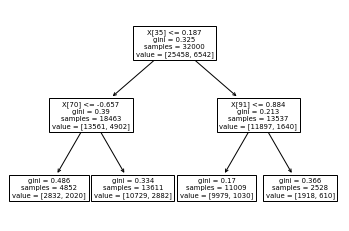

In [0]:
tree.plot_tree(clf)

In [0]:
#Pickle model 1
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
#Pickle model 1
with open('clf', 'wb') as c:
    pickle.dump(clf, c, pickle.HIGHEST_PROTOCOL)